In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
high_music = pd.read_csv("C:\\Users\\User\\Desktop\\데이터 분석 연습\\archive\high_popularity_spotify_data.csv")
low_music = pd.read_csv("C:\\Users\\User\\Desktop\\데이터 분석 연습\\archive\\low_popularity_spotify_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\User\AppData\Local\Temp\ipykernel_20072\3818750285.py:1: SyntaxWarning: invalid escape sequence '\h'
  high_music = pd.read_csv("C:\\Users\\User\\Desktop\\데이터 분석 연습\\archive\high_popularity_spotify_data.csv")


In [3]:
high_music.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')

In [4]:
low_music.columns

Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name'],
      dtype='object')

# 1. 높은 점수를 받은 노래의 장르는 무엇일지 확인
# 2. 높은 점수를 받은 가수는 누구일지 확인인

In [5]:
high_music_genre = high_music[['playlist_genre', 'track_popularity']].sort_values('track_popularity', ascending=False).reset_index()
high_music_genre

,index,playlist_genre,track_popularity
0,0,pop,100
1,676,pop,100
2,455,gaming,100
3,677,pop,98
4,4,pop,98
...,...,...,...
1681,244,hip-hop,68
1682,733,latin,68
1683,730,latin,68
1684,1583,hip-hop,68


In [6]:
high_music_genre_group = high_music_genre.groupby(['playlist_genre'])['track_popularity'].mean().reset_index()
high_music_genre_group.sort_values('track_popularity', ascending=False).reset_index()

,index,playlist_genre,track_popularity
0,9,gaming,80.430000
1,20,pop,80.042017
2,22,r&b,76.160000
3,25,soul,75.500000
4,15,k-pop,75.454545
5,17,latin,75.288043
6,8,folk,75.030303
7,24,rock,74.600000
8,1,ambient,74.278689
9,10,hip-hop,74.162996


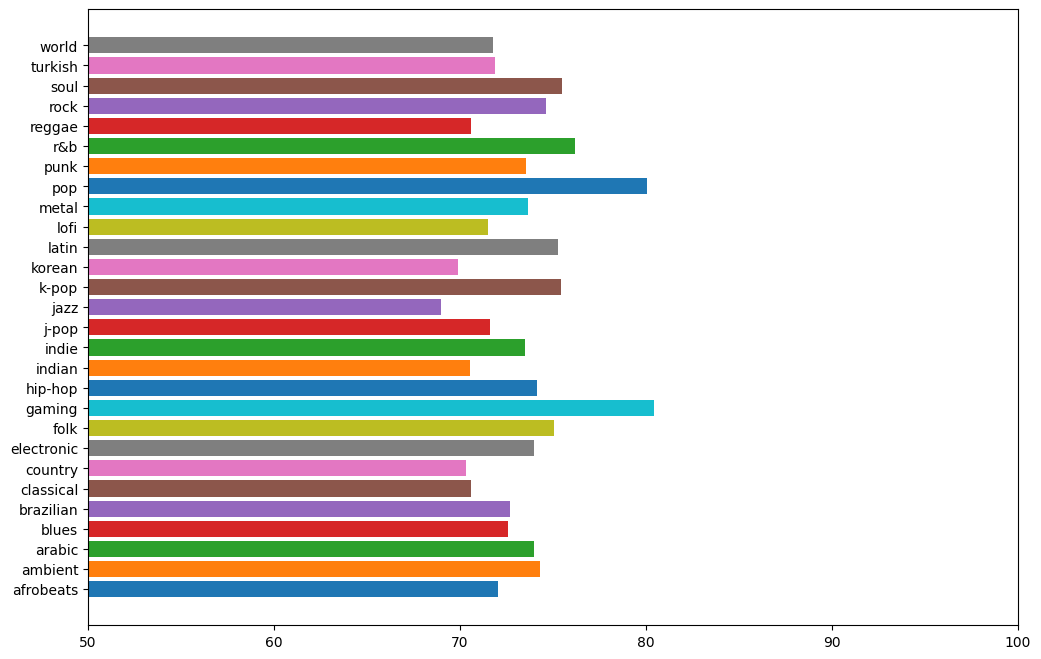

In [7]:
# colos= ['bisque','royalblue','lime','orange','rosybrown','mistryrose','violet','saddlebrown']
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.values()) * 2


plt.figure(figsize=(12, 8))
plt.barh(high_music_genre_group['playlist_genre'],high_music_genre_group['track_popularity'], color = colors[:29])
plt.xlim(50,100)
plt.show()


## 게임 음악 장르가 제일 높은 것으로 나오고 있다.
# 그렇다면, 게임 음악 장르에서도 어떤 BPM이 인기가 많은 걸까?

In [8]:
Gaming_BPM = high_music[['tempo', 'playlist_genre', 'track_popularity']][high_music['playlist_genre'] == 'gaming']
Gaming_BPM

,tempo,playlist_genre,track_popularity
455,157.969,gaming,100
456,104.978,gaming,97
457,116.712,gaming,94
458,103.969,gaming,90
459,159.920,gaming,89
...,...,...,...
550,118.051,gaming,73
551,146.441,gaming,73
552,75.486,gaming,73
553,145.988,gaming,73


In [9]:
# BPM 범위로 묶기
Gaming_BPM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 455 to 554
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo             100 non-null    float64
 1   playlist_genre    100 non-null    object 
 2   track_popularity  100 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


In [10]:
Gaming_BPM.loc[Gaming_BPM['tempo'].between(60,100.9999), 'temp_range'] = '70~100 BPM'
Gaming_BPM.loc[Gaming_BPM['tempo'].between(101,120.99999), 'temp_range'] = '101~120 BPM'
Gaming_BPM.loc[Gaming_BPM['tempo'].between(121,130.99999), 'temp_range'] = '121~130 BPM'
Gaming_BPM.loc[Gaming_BPM['tempo'].between(131,149.99999), 'temp_range'] = '131~149 BPM'
Gaming_BPM.loc[Gaming_BPM['tempo'].between(150,200), 'temp_range'] = '150 + BPM'


In [11]:
Gaming_BPM_group = Gaming_BPM.groupby(['temp_range'])['track_popularity'].mean().reset_index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_i

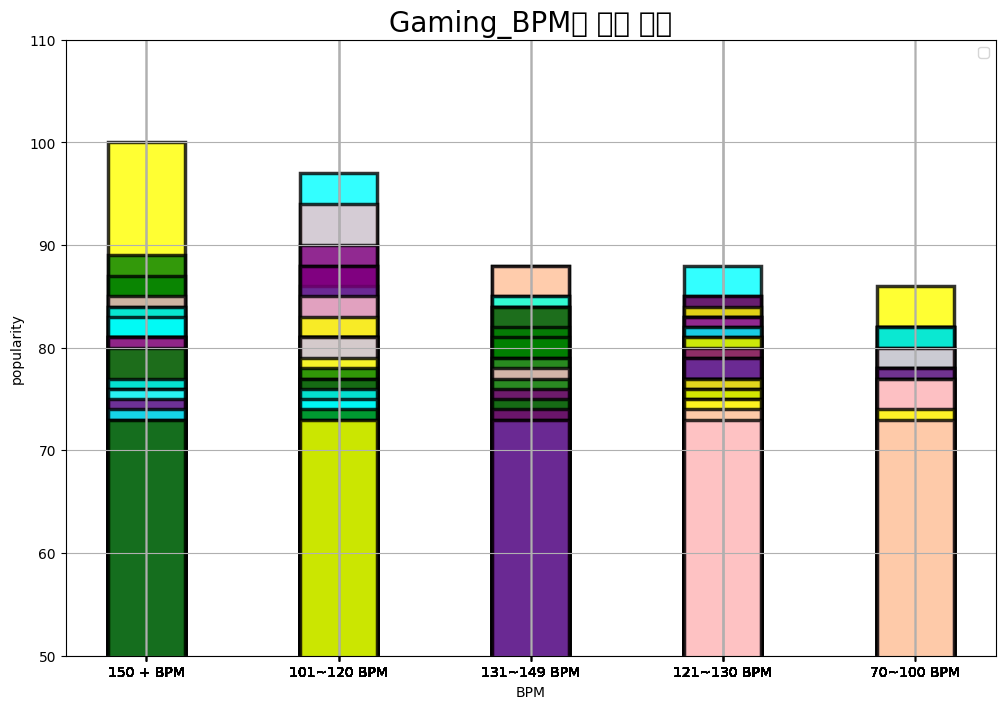

In [19]:
import numpy as np

x = Gaming_BPM['temp_range']
y = Gaming_BPM['track_popularity']

colors = ['yellow', 'cyan', 'pink', 'purple', 'green'] 

plt.figure(figsize=(12, 8))
plt.bar(x, y, width=0.4, color=colors, alpha = 0.8,edgecolor = 'black', linewidth = 2.5)
plt.xticks(x)
plt.title('Gaming_BPM에 따른 점수',fontsize=20) ## 타이틀 출력
plt.grid(True)
plt.ylim(50,110)
plt.xlabel('BPM') ## x축 라벨 출력
plt.ylabel('popularity') ## y축 라벨 출력
plt.legend(loc='best')
plt.show()